In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from scipy.stats import chi2_contingency

import xgboost as xgb
from xgboost import XGBClassifier

# 1. Data extraction and model

In [2]:
data_path = "../data/data_income.csv"
data_df = pd.read_csv(data_path)
data_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# Fix the format for y
data_df['income'] = data_df['income'].replace({">50K": 1, "<=50K": 0})

# Define the features and target
X = data_df.drop(["income"], axis=1)
y = data_df["income"]

# Define the categorical columns to one-hot encode
categorical_cols = [
    "occupation",
    "education",
    "workclass",
    "marital-status",
    "relationship",
    "race",
    "native-country",
    "gender",
]
numeric_cols = [
    "age",
    "fnlwgt",
    "educational-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
# Define preprocessing for categorical and numeric data
categorical_preprocessor = OneHotEncoder()
numeric_preprocessor = StandardScaler()

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_preprocessor, categorical_cols),
        ("num", numeric_preprocessor, numeric_cols),
    ],
    remainder="passthrough",  # Used to include any remaining columns
)

# Create a pipeline with preprocessing and the machine learning model
model = XGBClassifier(random_state=42)

pipeline = Pipeline([("preprocessor", preprocessor), ("model", model)])
# Fit the pipeline (including preprocessing) to the training data
pipeline.fit(X_train, y_train)
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

data_df["prediction"] = pipeline.predict(data_df.drop(["income"], axis=1))

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

/Users/francoismoreau/anaconda3/envs/base_machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/francoismoreau/anaconda3/envs/base_machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/francoismoreau/anaconda3/envs/base_machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/francoismoreau/anaconda3/envs/base_machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: Fut

Accuracy: 0.8750


/Users/francoismoreau/anaconda3/envs/base_machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/francoismoreau/anaconda3/envs/base_machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/francoismoreau/anaconda3/envs/base_machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/francoismoreau/anaconda3/envs/base_machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: Fut

In [5]:
# Gender based accuracy
accuracy_par_genre = {}
genres = ['Male', 'Female']
for genre in genres:
    mask_genre = X_test['gender'] == genre
    accuracy_genre = accuracy_score(y_test[mask_genre], y_pred[mask_genre])
    accuracy_par_genre[genre] = accuracy_genre

# Race based accuracy
accuracy_par_race = {}
races = ['White', 'Black']
for race in races:
    mask_race = X_test['race'] == race
    accuracy_race = accuracy_score(y_test[mask_race], y_pred[mask_race])
    accuracy_par_race[race] = accuracy_race

# Create a table to display results
tableau_accuracies = pd.DataFrame({
    'Global': accuracy,
    'Male': accuracy_par_genre['Male'],
    'Female': accuracy_par_genre['Female'],
    'White': accuracy_par_race['White'],
    'Black': accuracy_par_race['Black']
}, index=['Accuracy'])

print(tableau_accuracies)

            Global     Male    Female     White     Black
Accuracy  0.875013  0.84196  0.941068  0.867037  0.930187


/Users/francoismoreau/anaconda3/envs/base_machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/francoismoreau/anaconda3/envs/base_machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/francoismoreau/anaconda3/envs/base_machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/francoismoreau/anaconda3/envs/base_machine_learning/lib/python3.11/site-packages/sklearn/utils/validation.py:614: Fut

# 2. Statistical Parity Test

### Gender Statistical Parity Test

In [6]:
# Créer un tableau de contingence
contingency_table = pd.crosstab(data_df['gender'], data_df['prediction'])

# Effectuer le test du chi-carré
chi2, p, _, _ = chi2_contingency(contingency_table, correction=True)

# Interpréter le résultat
print(f"chi2 = {chi2}")
print(f"p_value = {p}")
if p < 0.05:
    print("There is no statistical parity (H0 rejected).")
else:
    print("There is no proof that there is no statistical parity (H0 not rejected).")

chi2 = 2166.0473846152154
p_value = 0.0
There is no statistical parity (H0 rejected).


In [7]:
contingency_table

prediction,0,1
gender,,
Female,14849,1343
Male,24062,8588


# 3. Conditional Statistical Parity Test

In [8]:
# Note in this failed cell that there is not enough diverse representation of 'Occupation' regarding other selected attributes ('Num_Ed' and 'Hours_Per_Week')

# Create a DataFrame combining true labels, predicted labels, and protected attributes (Gender), as well as the conditional features
results_df = pd.DataFrame({'True_Labels': data_df["income"], 'Predicted_Labels': data_df["prediction"], 'Gender': data_df['gender'], 'Num_Ed': data_df['educational-num'], 'Occupation': data_df['occupation'], 'Hours_Per_Week': data_df['hours-per-week']})

# Create bins for both "ComputerSkills" and "Age"
capital_gain_bins = [1, 3500, 7000, 20000]   # Define bins for ComputerSkills
hours_per_week_bins = [1, 30, 35, 40, 60]
num_ed_bins = [1, 9, 12, 20]

# Create bins for considering conditional features (creating subgroups)
results_df['Hours_Per_Week_Binned'] = pd.cut(results_df['Hours_Per_Week'], hours_per_week_bins)
results_df['Num_Ed_Binned'] = pd.cut(results_df['Num_Ed'], num_ed_bins)

# Calculate conditional counts for CSP considering both "ComputerSkills" and "Age"
csp_counts = results_df.groupby(['Gender', 'Predicted_Labels', 'Num_Ed_Binned', 'Hours_Per_Week_Binned', 'Occupation']).size().unstack(fill_value=0)

print(csp_counts)

# Perform the chi-squared test for each gender group
gender_groups = results_df['Gender'].unique()
chi2_values = {}

#for gender_group in gender_groups:
#    sub_df = csp_counts.loc[gender_group]
#    chi2, p, _, _ = chi2_contingency(sub_df)
#    chi2_values[gender_group] = chi2

# Calculate the critical value at a given significance level (e.g., 0.05)
#alpha = 0.05
#df = (len(csp_counts.columns) - 1) * (len(csp_counts.index) - 1)

#critical_value = chi2_contingency(sub_df, correction=False)[1]

# Check if the chi-squared statistics for all gender groups are below the critical value
#csp_satisfied = all(chi2 <= critical_value for chi2 in chi2_values.values())

#print("chi2_values",chi2_values)
#print("critical_value",critical_value)

#if csp_satisfied:
#    print("Conditional Statistical Parity is satisfied.")
#else:
#    print("Conditional Statistical Parity is not satisfied.")

Occupation                                                     ?  \
Gender Predicted_Labels Num_Ed_Binned Hours_Per_Week_Binned        
Female 0                (1, 9]        (1, 30]                295   
                                      (30, 35]                48   
                                      (35, 40]               239   
                                      (40, 60]                38   
                        (9, 12]       (1, 30]                235   
                                      (30, 35]                47   
                                      (35, 40]               181   
                                      (40, 60]                20   
                        (12, 20]      (1, 30]                 50   
                                      (30, 35]                 9   
                                      (35, 40]                34   
                                      (40, 60]                13   
       1                (1, 9]        (1, 30]   

/var/folders/95/2w4zxm7j571dt7gznpftznw80000gn/T/ipykernel_6759/2978149305.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  csp_counts = results_df.groupby(['Gender', 'Predicted_Labels', 'Num_Ed_Binned', 'Hours_Per_Week_Binned', 'Occupation']).size().unstack(fill_value=0)


In [9]:
# Create a DataFrame combining true labels, predicted labels, and protected attributes (Gender), as well as the conditional features
results_df = pd.DataFrame({'True_Labels': data_df["income"], 'Predicted_Labels': data_df["prediction"], 'Gender': data_df['gender'], 'Num_Ed': data_df['educational-num'], 'Hours_Per_Week': data_df['hours-per-week']})

# Create bins for considering conditional features (creating subgroups)
hours_per_week_bins = [1, 30, 35, 40, 60]
num_ed_bins = [1, 9, 12, 20]

# Bin the "ComputerSkills" and "Age" features
results_df['Hours_Per_Week_Binned'] = pd.cut(results_df['Hours_Per_Week'], hours_per_week_bins)
results_df['Num_Ed_Binned'] = pd.cut(results_df['Num_Ed'], num_ed_bins)

# Calculate conditional counts for CSP considering both "ComputerSkills" and "Age"
csp_counts = results_df.groupby(['Gender', 'Num_Ed_Binned', 'Hours_Per_Week_Binned', 'Predicted_Labels']).size().unstack(fill_value=0)

print(csp_counts)

# Perform the chi-squared test for each gender group
gender_groups = results_df['Gender'].unique()
chi2_values = {}

for gender_group in gender_groups:
    sub_df = csp_counts.loc[gender_group]
    chi2, p, _, _ = chi2_contingency(sub_df)
    chi2_values[gender_group] = chi2

# Calculate the critical value at a given significance level (e.g., 0.05)
alpha = 0.05
df = (len(csp_counts.columns) - 1) * (len(csp_counts.index) - 1)

critical_value = chi2_contingency(sub_df, correction=False)[1]

# Check if the chi-squared statistics for all gender groups are below the critical value
csp_satisfied = all(chi2 <= critical_value for chi2 in chi2_values.values())

print("chi2_values",chi2_values)
print("critical_value",critical_value)

if csp_satisfied:
    print("Conditional Statistical Parity is satisfied.")
else:
    print("Conditional Statistical Parity is not satisfied.")

/var/folders/95/2w4zxm7j571dt7gznpftznw80000gn/T/ipykernel_6759/1839143828.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  csp_counts = results_df.groupby(['Gender', 'Num_Ed_Binned', 'Hours_Per_Week_Binned', 'Predicted_Labels']).size().unstack(fill_value=0)


Predicted_Labels                               0     1
Gender Num_Ed_Binned Hours_Per_Week_Binned            
Female (1, 9]        (1, 30]                1924    23
                     (30, 35]                599    17
                     (35, 40]               3567   112
                     (40, 60]                693    31
       (9, 12]       (1, 30]                1529    51
                     (30, 35]                386    27
                     (35, 40]               2572   198
                     (40, 60]                617    76
       (12, 20]      (1, 30]                 444   113
                     (30, 35]                194    64
                     (35, 40]               1411   299
                     (40, 60]                643   299
Male   (1, 9]        (1, 30]                1829    16
                     (30, 35]                584    12
                     (35, 40]               7667   530
                     (40, 60]               3225   556
       (9,

# 4. FPDP

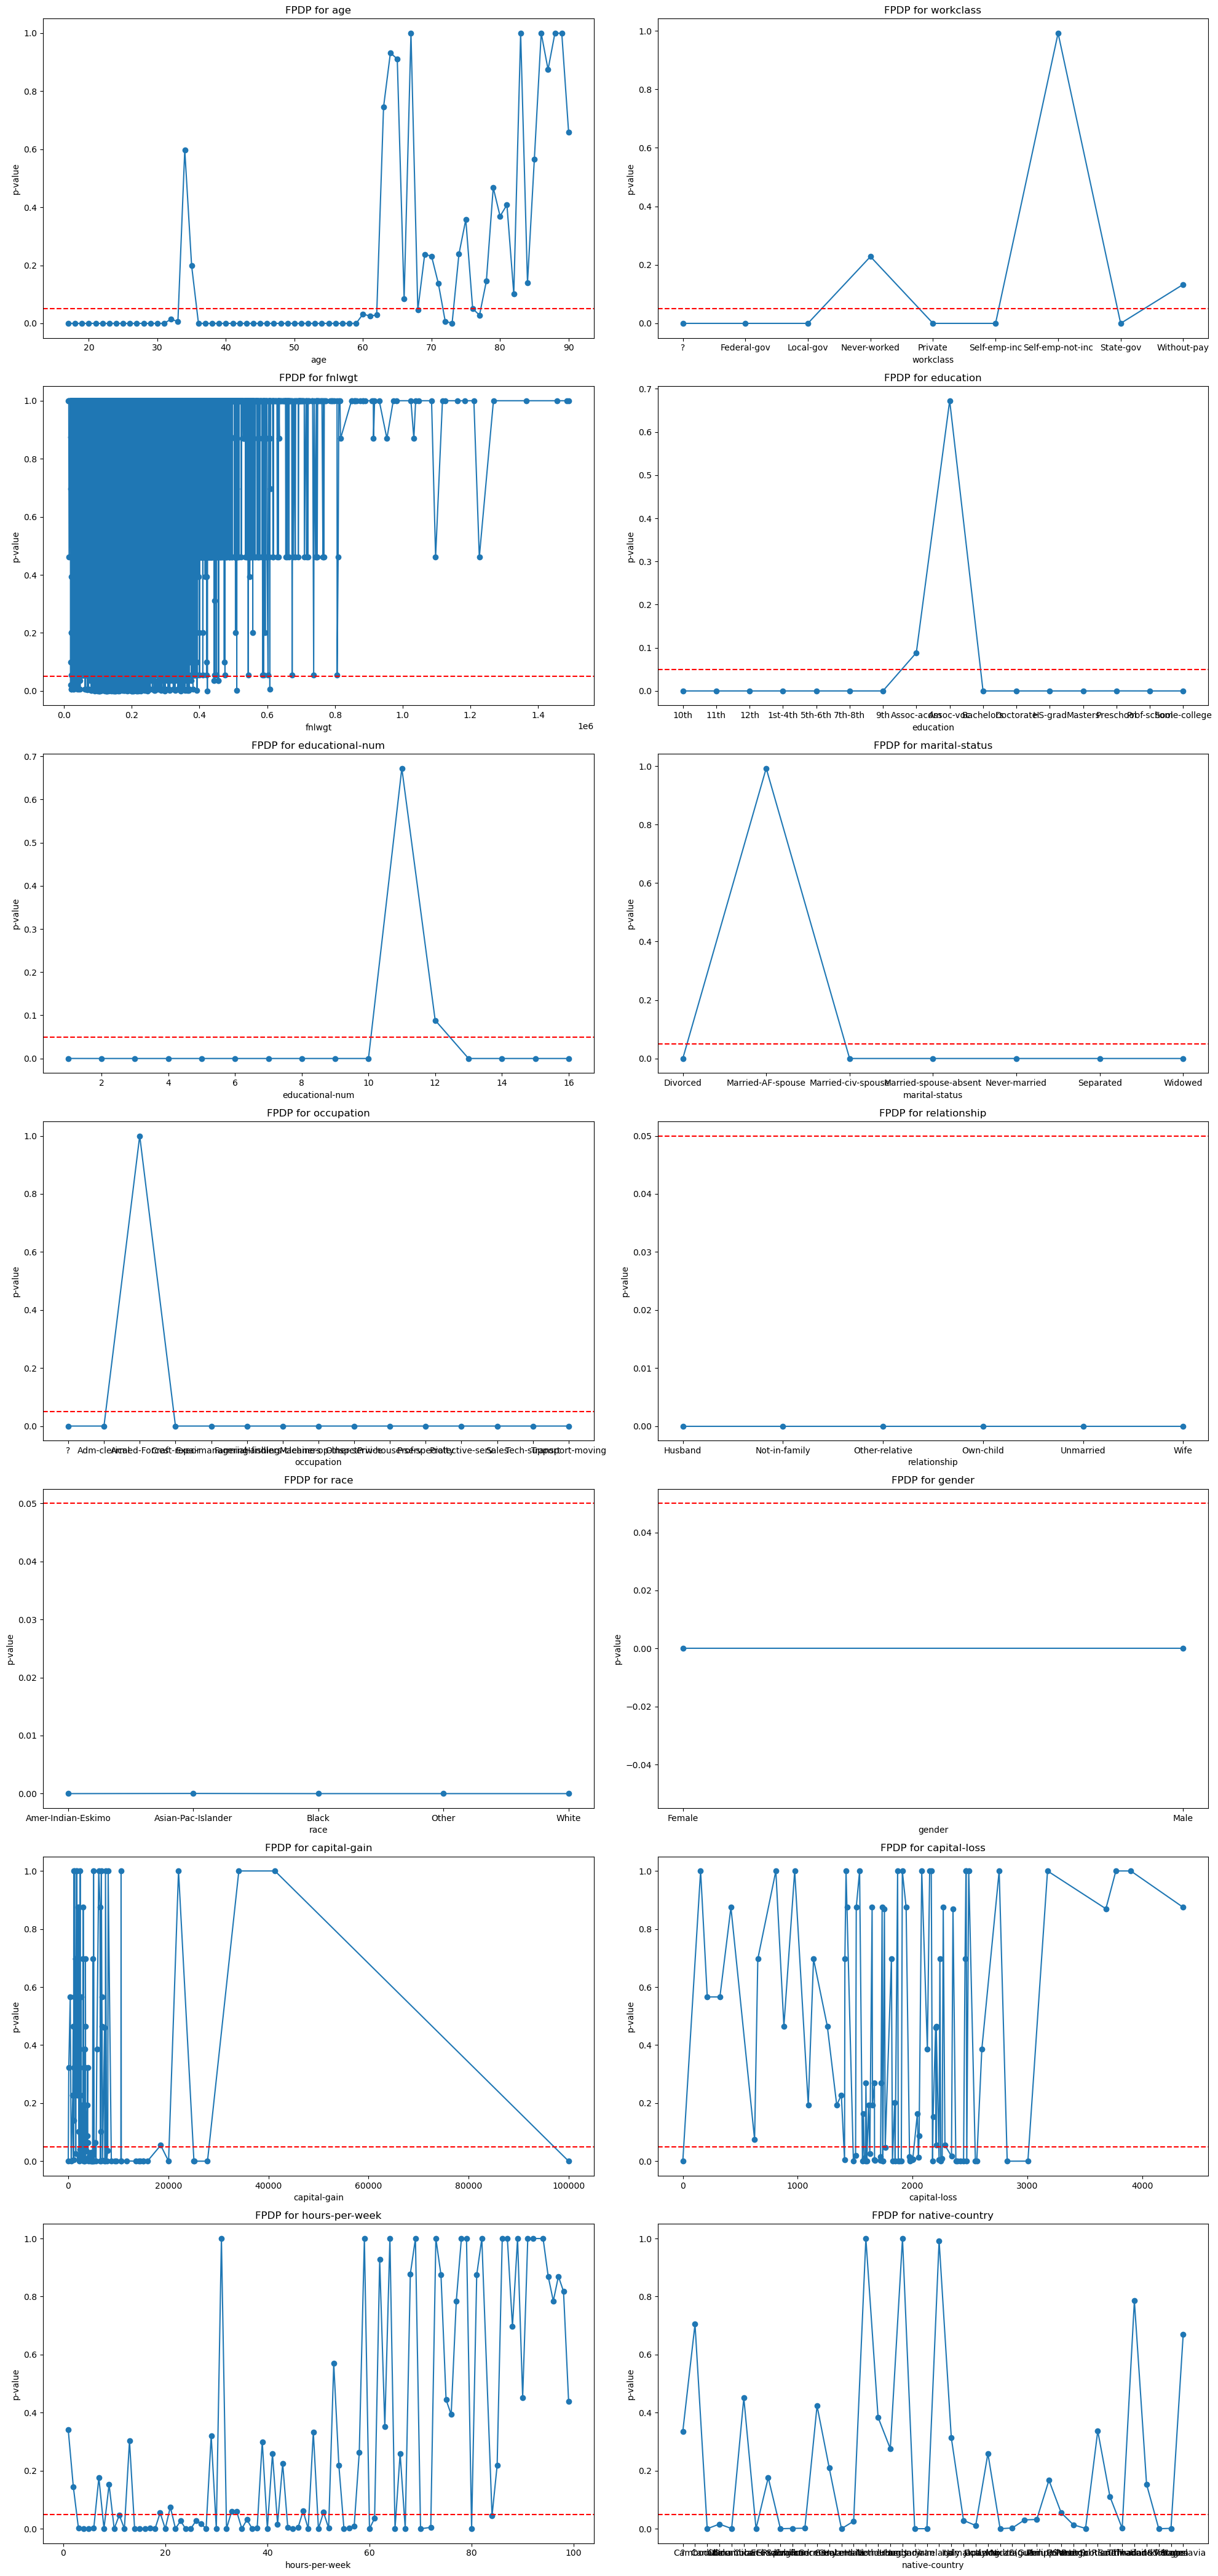

In [11]:
# List of features for which you want to create the FPDP
features_of_interest = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

# Initialize empty dictionaries to store feature values and fairness test statistics
feature_values = {}
fairness_p_vals = {}

# Iterate over each feature of interest
for feature_name in features_of_interest:
    # Get unique values for the current feature
    unique_values = np.sort(data_df[feature_name].unique())
    
    # Initialize lists to store feature values and corresponding fairness test statistics
    values = []
    p_vals = []
    
    # Iterate over each unique feature value
    for value in unique_values:
        # Create a contingency table for the current feature value and Gender
        contingency_table = pd.crosstab(data_df[feature_name] == value, data_df['prediction'])
        
        # Perform chi-squared test for statistical parity
        chi2, p, _, _ = chi2_contingency(contingency_table)
        
        # Append feature value and fairness test statistic to the lists
        values.append(value)
        #test_stats.append(chi2)
        p_vals.append(p)

    
    # Store feature values and test statistics in dictionaries
    feature_values[feature_name] = values
    fairness_p_vals[feature_name] = p_vals

# Calculate the number of rows needed
n_features = len(features_of_interest)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols  # Ceiling division to ensure enough rows

# Create subplots grid
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10 * n_cols, 6 * n_rows))
axs = axs.flatten()  # Flatten the 2D array of axes to simplify indexing

# Plot the FPDP for each feature
for i, feature_name in enumerate(features_of_interest):
    ax = axs[i]
    ax.plot(feature_values[feature_name], fairness_p_vals[feature_name], marker='o', linestyle='-')
    # Add a red line at p-value = 0.05 to the plot
    ax.axhline(y=0.05, color='red', linestyle='--', label='P-Value (0.05)')
    ax.set_xlabel(feature_name)
    ax.set_ylabel('p-value')
    ax.set_title(f'FPDP for {feature_name}')

# Hide any unused subplots
for i in range(n_features, n_rows * n_cols):
    axs[i].axis('off')

plt.tight_layout()

plt.savefig('FPDP')
plt.show()